# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import copy
import time
import matplotlib.pyplot as plt
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Neural Network Architecture

In [7]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, action_size)
        
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 256)
        self.fc2 = nn.Linear(256+action_size, 256)
        self.fc3 = nn.Linear(256, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.leaky_relu(self.fc1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.leaky_relu(self.fc2(x))
        return self.fc3(x)


# Agent DDPG

In [8]:
#hyperparameters
BUFFER_SIZE = int(1e6)#replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA =0.99           # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 3e-4         # learning rate of the actor
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(action_size, random_seed)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)



# OUNoise

In [9]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.05):
        """Initialize parameters and noise process.
        Params
        ======
            mu: long-running mean
            theta: the speed of mean reversion
            sigma: the volatility parameter
        """
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state



# ReplayBuffer

In [10]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

# Function DDPG

In [11]:
def ddpg(n_episodes=2000, max_t=1000):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=1000)
    scores = np.zeros(num_agents)
    scores_episode = []
    
    agents =[] 
    
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            #actions = [agents[i].act(states[i]) for i in range(num_agents)]
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
#             if t == 0:
#                 print("actions", actions)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'actor.pth')
            torch.save(agent.critic_local.state_dict(), 'critic.pth')
            break
            
    return scores_episode



Episode 1	Score: 0.97	Average Score: 0.97.97
Episode 2	Score: 0.14	Average Score: 0.55.14
Episode 3	Score: 0.82	Average Score: 0.64.82
Episode 4	Score: 0.10	Average Score: 0.51.10
Episode 5	Score: 0.24	Average Score: 0.45.24
Episode 6	Score: 0.00	Average Score: 0.38.00
Episode 7	Score: 0.00	Average Score: 0.32.00
Episode 8	Score: 0.45	Average Score: 0.34.45
Episode 9	Score: 0.84	Average Score: 0.40.84
Episode 10	Score: 0.12	Average Score: 0.3712
Episode 11	Score: 1.15	Average Score: 0.4415
Episode 12	Score: 0.59	Average Score: 0.4559
Episode 13	Score: 0.06	Average Score: 0.4206
Episode 14	Score: 2.52	Average Score: 0.5752
Episode 15	Score: 1.87	Average Score: 0.6687
Episode 16	Score: 1.34	Average Score: 0.7034
Episode 17	Score: 1.95	Average Score: 0.7795
Episode 18	Score: 2.09	Average Score: 0.8509
Episode 19	Score: 2.90	Average Score: 0.9690
Episode 20	Score: 1.58	Average Score: 0.9958
Episode 21	Score: 2.15	Average Score: 1.0415
Episode 22	Score: 2.17	Average Score: 1.0917
Episode 23

Episode 180	Score: 9.36	Average Score: 6.326
Episode 181	Score: 13.01	Average Score: 6.36.01
Episode 182	Score: 10.60	Average Score: 6.38.60
Episode 183	Score: 6.42	Average Score: 6.382
Episode 184	Score: 15.63	Average Score: 6.43.63
Episode 185	Score: 13.93	Average Score: 6.47.93
Episode 186	Score: 10.39	Average Score: 6.49.39
Episode 187	Score: 14.13	Average Score: 6.53.13
Episode 188	Score: 13.95	Average Score: 6.57.95
Episode 189	Score: 13.81	Average Score: 6.61.81
Episode 190	Score: 10.33	Average Score: 6.63.33
Episode 191	Score: 15.73	Average Score: 6.68.73
Episode 192	Score: 1.26	Average Score: 6.656
Episode 193	Score: 16.80	Average Score: 6.70.80
Episode 194	Score: 16.50	Average Score: 6.75.50
Episode 195	Score: 16.81	Average Score: 6.80.81
Episode 196	Score: 13.98	Average Score: 6.84.98
Episode 197	Score: 12.60	Average Score: 6.87.60
Episode 198	Score: 2.96	Average Score: 6.856
Episode 199	Score: 5.88	Average Score: 6.858
Episode 200	Score: 13.34	Average Score: 6.88.34
Episode

Episode 351	Score: 35.72	Average Score: 12.7072
Episode 352	Score: 33.52	Average Score: 12.7652
Episode 353	Score: 22.05	Average Score: 12.7805
Episode 354	Score: 6.50	Average Score: 12.77
Episode 355	Score: 35.57	Average Score: 12.8357
Episode 356	Score: 31.72	Average Score: 12.8872
Episode 357	Score: 38.14	Average Score: 12.9514
Episode 358	Score: 16.57	Average Score: 12.9657
Episode 359	Score: 36.59	Average Score: 13.0359
Episode 360	Score: 8.36	Average Score: 13.02
Episode 361	Score: 5.63	Average Score: 13.00
Episode 362	Score: 7.23	Average Score: 12.98
Episode 363	Score: 37.03	Average Score: 13.0503
Episode 364	Score: 35.58	Average Score: 13.1158
Episode 365	Score: 13.07	Average Score: 13.1107
Episode 366	Score: 20.93	Average Score: 13.1393
Episode 367	Score: 5.17	Average Score: 13.11
Episode 368	Score: 38.50	Average Score: 13.1850
Episode 369	Score: 4.70	Average Score: 13.15
Episode 370	Score: 31.54	Average Score: 13.2054
Episode 371	Score: 37.80	Average Score: 13.2780
Episode 37

Episode 521	Score: 33.15	Average Score: 17.3515
Episode 522	Score: 33.86	Average Score: 17.3986
Episode 523	Score: 15.09	Average Score: 17.3809
Episode 524	Score: 34.74	Average Score: 17.4174
Episode 525	Score: 19.10	Average Score: 17.4210
Episode 526	Score: 35.83	Average Score: 17.4583
Episode 527	Score: 30.65	Average Score: 17.4865
Episode 528	Score: 22.73	Average Score: 17.4973
Episode 529	Score: 27.96	Average Score: 17.5196
Episode 530	Score: 33.80	Average Score: 17.5480
Episode 531	Score: 37.77	Average Score: 17.5877
Episode 532	Score: 39.19	Average Score: 17.6219
Episode 533	Score: 36.73	Average Score: 17.6573
Episode 534	Score: 20.51	Average Score: 17.6651
Episode 535	Score: 39.44	Average Score: 17.7044
Episode 536	Score: 33.78	Average Score: 17.7378
Episode 537	Score: 37.08	Average Score: 17.7708
Episode 538	Score: 36.79	Average Score: 17.8079
Episode 539	Score: 15.63	Average Score: 17.8063
Episode 540	Score: 34.15	Average Score: 17.8315
Episode 541	Score: 28.42	Average Score: 

Episode 691	Score: 38.74	Average Score: 21.3874
Episode 692	Score: 38.33	Average Score: 21.4033
Episode 693	Score: 37.45	Average Score: 21.4345
Episode 694	Score: 31.14	Average Score: 21.4414
Episode 695	Score: 36.70	Average Score: 21.4670
Episode 696	Score: 32.41	Average Score: 21.4841
Episode 697	Score: 31.15	Average Score: 21.4915
Episode 698	Score: 30.59	Average Score: 21.5059
Episode 699	Score: 28.49	Average Score: 21.5149
Episode 700	Score: 38.96	Average Score: 21.5496
Episode 700	Average Score: 21.54
Episode 701	Score: 36.97	Average Score: 21.5697
Episode 702	Score: 38.52	Average Score: 21.5952
Episode 703	Score: 37.11	Average Score: 21.6111
Episode 704	Score: 36.33	Average Score: 21.6333
Episode 705	Score: 35.39	Average Score: 21.6539
Episode 706	Score: 36.85	Average Score: 21.6785
Episode 707	Score: 38.18	Average Score: 21.6918
Episode 708	Score: 35.34	Average Score: 21.7134
Episode 709	Score: 37.73	Average Score: 21.7373
Episode 710	Score: 37.67	Average Score: 21.7667
Episode

Episode 860	Score: 37.44	Average Score: 24.3444
Episode 861	Score: 39.22	Average Score: 24.3622
Episode 862	Score: 37.78	Average Score: 24.3778
Episode 863	Score: 36.37	Average Score: 24.3937
Episode 864	Score: 34.76	Average Score: 24.4076
Episode 865	Score: 37.19	Average Score: 24.4119
Episode 866	Score: 39.56	Average Score: 24.4356
Episode 867	Score: 36.05	Average Score: 24.4405
Episode 868	Score: 29.33	Average Score: 24.4533
Episode 869	Score: 39.01	Average Score: 24.4701
Episode 870	Score: 37.44	Average Score: 24.4844
Episode 871	Score: 35.44	Average Score: 24.4944
Episode 872	Score: 38.35	Average Score: 24.5135
Episode 873	Score: 38.80	Average Score: 24.5380
Episode 874	Score: 35.20	Average Score: 24.5420
Episode 875	Score: 36.08	Average Score: 24.5508
Episode 876	Score: 39.40	Average Score: 24.5740
Episode 877	Score: 34.18	Average Score: 24.5818
Episode 878	Score: 37.65	Average Score: 24.5965
Episode 879	Score: 39.36	Average Score: 24.6136
Episode 880	Score: 39.51	Average Score: 

Episode 1029	Score: 37.52	Average Score: 27.122
Episode 1030	Score: 37.06	Average Score: 27.166
Episode 1031	Score: 38.19	Average Score: 27.199
Episode 1032	Score: 38.79	Average Score: 27.239
Episode 1033	Score: 38.11	Average Score: 27.261
Episode 1034	Score: 38.25	Average Score: 27.295
Episode 1035	Score: 35.12	Average Score: 27.332
Episode 1036	Score: 39.47	Average Score: 27.367
Episode 1037	Score: 39.22	Average Score: 27.402
Episode 1038	Score: 39.50	Average Score: 27.440
Episode 1039	Score: 38.13	Average Score: 27.473
Episode 1040	Score: 38.36	Average Score: 27.516
Episode 1041	Score: 38.89	Average Score: 27.549
Episode 1042	Score: 36.98	Average Score: 27.588
Episode 1043	Score: 39.25	Average Score: 27.615
Episode 1044	Score: 36.58	Average Score: 27.648
Episode 1045	Score: 38.36	Average Score: 27.686
Episode 1046	Score: 38.89	Average Score: 27.719
Episode 1047	Score: 34.31	Average Score: 27.741
Episode 1048	Score: 35.21	Average Score: 27.771
Episode 1049	Score: 38.22	Average Score:

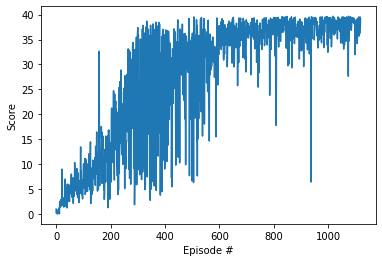

In [12]:
scores = ddpg()
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
env.close()